xtrain shape (30, 460)
ytrain shape (1, 460)
train w shape (30, 1)
xval shape (30, 52)
yval shape (52,)
val w shape (30, 1)
Output is [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[[34  0]
 [ 2 21]] is the confusion matrix
AccuracyScore 0.9649122807017544
Precision 1.0
Recall 0.9444444444444444
AccuracyFormula 0.9649122807017544


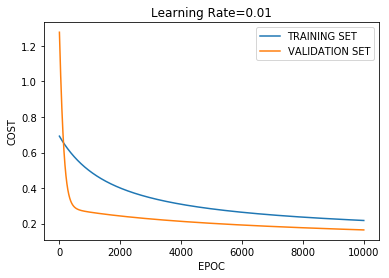

In [107]:
import pandas
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas 
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.model_selection import train_test_split
  
import matplotlib.pyplot as plt 
df = pandas.read_csv("F:/UB/Fall '19/ML/wdbc.dataset",names=['ID','Diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points','symmetry','fractal_dimension','radiusSE','textureSE','perimeterSE','areaSE','smoothnessSE','compactnessSE','concavitySE','concave_pointsSE','symmetrySE','fractal_dimensionSE','radiusW','textureSW','perimeterW','areaW','smoothnessW','compactnessW','concavityW','concave_pointsW','symmetryW','fractal_dimensionW'])
# DATA IMPORTED

data=df.drop(['ID'], axis = 1)  #1ST COLUMN DROPPED

data.Diagnosis = [1 if each == "M" else 0 for each in data.Diagnosis]  #LABELLING OF DIAGNOSIS COLUMN
y = data.Diagnosis.values  #FEATURES AS 'Y'

x = data.drop(['Diagnosis'], axis = 1)  #DIAGNOSIS COLUMN AS 'X'


for feature in x.columns:
    max_value = df[feature].max()
    min_value = df[feature].min()
    x[feature] = (df[feature] - min_value) / (max_value - min_value)  #NORMALIZATION




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 1) 
#SPLITTING INTO 90% TRAIN 10% TEST
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.10, random_state = 1)  
#SPLITTING INTO 80% TRAIN 10% VALIDATION



y_train = y_train.reshape(1, y_train.shape[0])

x_train=x_train.T
y_train=y_train
print('xtrain shape',x_train.shape)
print('ytrain shape',y_train.shape)
#INITIALISATION
epochs = 10000  
learningrate = 0.01
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
losstrack = [] #ARRAY OF LOSS

m = x_train.shape[1]
w = np.random.randn(x_train.shape[0], 1)*0.01
b = 0

#PASSING training set INTO LOGISTIC REGRESSION
for epoch in range(epochs):
    z = np.dot( w.T,x_train) + b
    p = sigmoid(z)    
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1 - y_train), np.log(1 - p)))/m 
    losstrack.append(np.squeeze(cost))
    dz = p-y_train   #ERROR - gradient descent
    dw = (1 / m) * np.dot(x_train, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learningrate * dw  #UPDATING w
    b = b - learningrate * db  #UPDATING b
print('train w shape',w.shape)

plt.figure(1) #graph : training set vs epochs
plt.title("TRAINING SET")
plt.xlabel("EPOC")
plt.ylabel("COST")
plt.plot(losstrack,label='TRAINING SET')
plt.legend()
Vlosstrack = []
b = 0
x_val=x_val.T
y_val=y_val.T

print('xval shape',x_val.shape)
print('yval shape',y_val.shape)
#PASSING validation set INTO LOGISTIC REGRESSION
for epoch in range(epochs):
    m = x_val.shape[1]
    z1 = np.dot(w.T, x_val) + b
    p1 = sigmoid(z1)
    cost = -np.sum(np.multiply(np.log(p1), y_val) + np.multiply((1 - y_val), np.log(1 - p1)))/m
    Vlosstrack.append(np.squeeze(cost))
    dz1 = p1-y_val   #ERROR - gradient descent
    dw = (1 / m) * np.dot(x_val, dz1.T)
    db = (1 / m) * np.sum(dz1)
    w = w - learningrate * dw #updating w
    b = b - learningrate * db  #updating b
print('val w shape',w.shape)   
plt.figure(1)
plt.title("Learning Rate=0.01")
plt.xlabel("EPOC")
plt.ylabel("COST")
plt.plot(Vlosstrack,label='VALIDATION SET')
plt.legend()

#PASSING TESTING SET
def prediction(w,b,x_test):
    z2=np.dot(x_test,w)+b
    p2= sigmoid(z2)
    output=[]
    for i in range(len(p2)):  #LESS THAN 0.5 IS 0
        if p2[i]<0.5:
            output.append(0)
        else:
            output.append(1)  #GREATER THAN 0.5 IS 1
    return output


p3=prediction(w,b,x_test)
count=0
th=np.array(p3)
for i in range(len(y_test)):  #PREDICTING ACCURACY MANUALLY
    if (y_test[i]==th[i]):
        count=count+1
# print('count',count)
y_test=y_test.tolist()

print('Output is',p3)

ConfusionMatrix=confusion_matrix(y_test,p3)  #CONFUSION MATRIX
print(ConfusionMatrix,'is the confusion matrix')

accuracy= accuracy_score(y_test,p3)  #ACCURACY SCORE
print('AccuracyScore',accuracy)

tp=ConfusionMatrix[0][0]
fp=ConfusionMatrix[0][1]
fn=ConfusionMatrix[1][0]
tn=ConfusionMatrix[1][1]

pre = tp/(tp+fp)   #PRECISION
recall=tp/(tp+fn)    #RECALL
acc=(tp+tn)/(tp+tn+fp+fn)    #ACCURACY

print('Precision',pre)
print('Recall',recall)
print('AccuracyFormula',acc)





NameError: name 'Y_Value' is not defined